本notebook收集与[《交通时空大数据分析、挖掘与可视化（Python版）》](https://book.douban.com/subject/36092545/)

In [2]:
#运行这个代码可以让Python不显示warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# 网络构建

## 地铁线网数据读取

<AxesSubplot:>

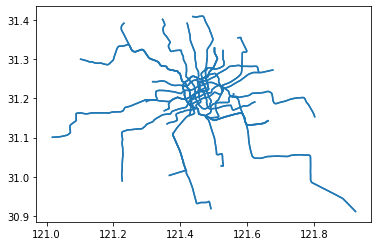

In [4]:
import pandas as pd
import geopandas
#读取轨道线路gis文件
line = geopandas.GeoDataFrame.from_file('data/line.json',encoding = 'utf-8')
line.plot()

In [5]:
#读取轨道站点数据
stop = pd.read_csv(r'data/stop.csv')
stop

,stationnames,linename,lon,lat
0,富锦路,地铁1号线(富锦路-莘庄),121.420012,31.394078
1,友谊西路,地铁1号线(富锦路-莘庄),121.423351,31.382958
2,宝安公路,地铁1号线(富锦路-莘庄),121.426290,31.371680
3,共富新村,地铁1号线(富锦路-莘庄),121.429462,31.356866
4,呼兰路,地铁1号线(富锦路-莘庄),121.433107,31.341553
...,...,...,...,...
945,三鲁公路,轨道交通浦江线(沈杜公路-汇臻路),121.523211,31.058207
946,闵瑞路,轨道交通浦江线(沈杜公路-汇臻路),121.526112,31.050321
947,浦航路,轨道交通浦江线(沈杜公路-汇臻路),121.526392,31.043280
948,东城一路,轨道交通浦江线(沈杜公路-汇臻路),121.527925,31.032497


In [6]:
stop['stationnames'].drop_duplicates()

0       富锦路
1      友谊西路
2      宝安公路
3      共富新村
4       呼兰路
       ... 
938     汇臻路
939    东城一路
940     浦航路
941     闵瑞路
942    三鲁公路
Name: stationnames, Length: 344, dtype: object

In [7]:
stop['stationnames'].drop_duplicates()

0       富锦路
1      友谊西路
2      宝安公路
3      共富新村
4       呼兰路
       ... 
938     汇臻路
939    东城一路
940     浦航路
941     闵瑞路
942    三鲁公路
Name: stationnames, Length: 344, dtype: object

<AxesSubplot:>

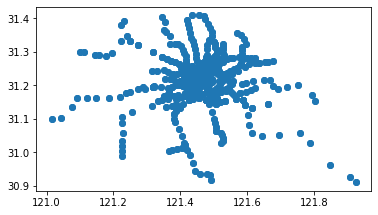

In [8]:
#从站点经纬度信息生成地理信息列geometry，并将站点数据转换为GeoDataFrame
stop['geometry'] = geopandas.points_from_xy(stop['lon'],stop['lat'])
stop = geopandas.GeoDataFrame(stop)
stop.plot()

## 网络的轨道边

In [9]:
#提取相邻站点构成的轨道边
stop['linename1'] = stop['linename'].shift(-1)
stop['stationnames1'] = stop['stationnames'].shift(-1)
stop = stop[stop['linename'] == stop['linename1']]
stop

,stationnames,linename,lon,lat,geometry,linename1,stationnames1
0,富锦路,地铁1号线(富锦路-莘庄),121.420012,31.394078,POINT (121.42001 31.39408),地铁1号线(富锦路-莘庄),友谊西路
1,友谊西路,地铁1号线(富锦路-莘庄),121.423351,31.382958,POINT (121.42335 31.38296),地铁1号线(富锦路-莘庄),宝安公路
2,宝安公路,地铁1号线(富锦路-莘庄),121.426290,31.371680,POINT (121.42629 31.37168),地铁1号线(富锦路-莘庄),共富新村
3,共富新村,地铁1号线(富锦路-莘庄),121.429462,31.356866,POINT (121.42946 31.35687),地铁1号线(富锦路-莘庄),呼兰路
4,呼兰路,地铁1号线(富锦路-莘庄),121.433107,31.341553,POINT (121.43311 31.34155),地铁1号线(富锦路-莘庄),通河新村
...,...,...,...,...,...,...,...
944,沈杜公路,轨道交通浦江线(沈杜公路-汇臻路),121.508229,31.063552,POINT (121.50823 31.06355),轨道交通浦江线(沈杜公路-汇臻路),三鲁公路
945,三鲁公路,轨道交通浦江线(沈杜公路-汇臻路),121.523211,31.058207,POINT (121.52321 31.05821),轨道交通浦江线(沈杜公路-汇臻路),闵瑞路
946,闵瑞路,轨道交通浦江线(沈杜公路-汇臻路),121.526112,31.050321,POINT (121.52611 31.05032),轨道交通浦江线(沈杜公路-汇臻路),浦航路
947,浦航路,轨道交通浦江线(沈杜公路-汇臻路),121.526392,31.043280,POINT (121.52639 31.04328),轨道交通浦江线(沈杜公路-汇臻路),东城一路


In [10]:
#提取线路名
stop['line'] = stop['linename'].apply(lambda r:r.split('(')[0].lstrip('地铁'))
#五号线支线 去掉 支线两个字，使其能够对应
stop.loc[stop['line'] == '5号线支线','line'] = '5号线'
#重命名列名
stop = stop.rename(columns = {'stationnames':'ostop','stationnames1':'dstop'})
#构建站点名称，使得不同线路不同站点能够区分
stop['ostation'] = stop['line']+stop['ostop']
stop['dstation'] = stop['line']+stop['dstop']
#列太多，转置方便查看
stop.iloc[:3].T

,0,1,2
ostop,富锦路,友谊西路,宝安公路
linename,地铁1号线(富锦路-莘庄),地铁1号线(富锦路-莘庄),地铁1号线(富锦路-莘庄)
lon,121.42,121.423,121.426
lat,31.3941,31.383,31.3717
geometry,POINT (121.4200119773726 31.39407815119172),POINT (121.4233512258209 31.38295762913749),POINT (121.4262896552612 31.37168003978507)
linename1,地铁1号线(富锦路-莘庄),地铁1号线(富锦路-莘庄),地铁1号线(富锦路-莘庄)
dstop,友谊西路,宝安公路,共富新村
line,1号线,1号线,1号线
ostation,1号线富锦路,1号线友谊西路,1号线宝安公路
dstation,1号线友谊西路,1号线宝安公路,1号线共富新村


In [11]:
#构建网络边的第一部分：轨道边
edge1 = stop[['ostation','dstation']]
#给边添加权重，假定地铁搭一个站点耗时3分钟
edge1['duration'] = 3
edge1.head(5)

,ostation,dstation,duration
0,1号线富锦路,1号线友谊西路,3
1,1号线友谊西路,1号线宝安公路,3
2,1号线宝安公路,1号线共富新村,3
3,1号线共富新村,1号线呼兰路,3
4,1号线呼兰路,1号线通河新村,3


## 网络的换乘边

In [12]:
import pandas as pd
#读取轨道站点数据
stop = pd.read_csv(r'data/stop.csv')
#提取线路名，构建站点名
stop['line'] = stop['linename'].apply(lambda r:r.split('(')[0].lstrip('地铁'))
stop['station'] = stop['line'] + stop['stationnames']

In [13]:
#计算每个站点在数据中出现了多少次
tmp = stop.groupby(['stationnames'])['linename'].count().rename('count').reset_index()
tmp

,stationnames,count
0,七宝,2
1,七莘路,2
2,三林,4
3,三林东,4
4,三门路,4
...,...,...
339,龙柏新村,2
340,龙溪路,4
341,龙漕路,4
342,龙耀路,4


In [14]:
#超过两次的为换乘站点，提取出来
tmp = pd.merge(stop,tmp[tmp['count']>2]['stationnames'],on = 'stationnames')
tmp

,stationnames,linename,lon,lat,line,station
0,上海火车站,地铁1号线(富锦路-莘庄),121.451347,31.249252,1号线,1号线上海火车站
1,上海火车站,地铁1号线(莘庄-富锦路),121.451347,31.249252,1号线,1号线上海火车站
2,上海火车站,地铁3号线(江杨北路-上海南站),121.453726,31.251608,3号线,3号线上海火车站
3,上海火车站,地铁3号线(上海南站-江杨北路),121.453726,31.251608,3号线,3号线上海火车站
4,上海火车站,地铁4号线(外圈(宜山路-宜山路)),121.453727,31.251607,4号线,4号线上海火车站
...,...,...,...,...,...,...
451,嘉定新城,地铁11号线(迪士尼-花桥),121.250005,31.332072,11号线,11号线嘉定新城
452,华夏中路,地铁13号线(张江路-金运路),121.577279,31.176771,13号线,13号线华夏中路
453,华夏中路,地铁13号线(金运路-张江路),121.577279,31.176771,13号线,13号线华夏中路
454,华夏中路,地铁16号线(龙阳路-滴水湖),121.578983,31.177900,16号线,16号线华夏中路


In [15]:
#为换乘站构建边
tmp = tmp[['stationnames','line','station']].drop_duplicates()
#对站点生成不同线路之间的对应表
tmp = pd.merge(tmp,tmp,on ='stationnames')
tmp

,stationnames,line_x,station_x,line_y,station_y
0,上海火车站,1号线,1号线上海火车站,1号线,1号线上海火车站
1,上海火车站,1号线,1号线上海火车站,3号线,3号线上海火车站
2,上海火车站,1号线,1号线上海火车站,4号线,4号线上海火车站
3,上海火车站,3号线,3号线上海火车站,1号线,1号线上海火车站
4,上海火车站,3号线,3号线上海火车站,3号线,3号线上海火车站
...,...,...,...,...,...
365,嘉定新城,11号线,11号线嘉定新城,11号线,11号线嘉定新城
366,华夏中路,13号线,13号线华夏中路,13号线,13号线华夏中路
367,华夏中路,13号线,13号线华夏中路,16号线,16号线华夏中路
368,华夏中路,16号线,16号线华夏中路,13号线,13号线华夏中路


In [16]:
#提取换乘边，并加上权重，假定换乘耗时为5分钟
edge2 =tmp[tmp['line_x'] != tmp['line_y']][['station_x','station_y']]
edge2.columns = ['ostation','dstation']
edge2['duration'] = 5
edge2

,ostation,dstation,duration
1,1号线上海火车站,3号线上海火车站,5
2,1号线上海火车站,4号线上海火车站,5
3,3号线上海火车站,1号线上海火车站,5
5,3号线上海火车站,4号线上海火车站,5
6,4号线上海火车站,1号线上海火车站,5
...,...,...,...
343,16号线罗山路,11号线罗山路,5
353,11号线隆德路,13号线隆德路,5
354,13号线隆德路,11号线隆德路,5
367,13号线华夏中路,16号线华夏中路,5


## 网络的构建

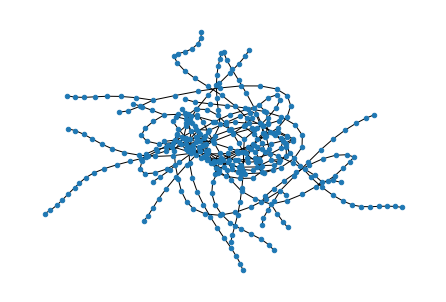

In [17]:
#将两类合并
edge = edge1.append(edge2)
#提取其中的节点
node = list(edge['ostation'].drop_duplicates())
#构建轨道网络
import networkx as nx
#先创建一个空网络
G = nx.Graph()
#添加节点
G.add_nodes_from(node)
#添加含有权重的无向边
G.add_weighted_edges_from(edge.values)
#绘制网络草图
nx.draw(G,node_size = 20)

In [18]:
#测试最短路径能否获取
nx.shortest_path(G, source='11号线昌吉东路', target='10号线同济大学',weight='weight')

['11号线昌吉东路',
 '11号线上海赛车场',
 '11号线嘉定新城',
 '11号线马陆',
 '11号线南翔',
 '11号线桃浦新村',
 '11号线武威路',
 '11号线祁连山路',
 '11号线李子园',
 '11号线上海西站',
 '11号线真如',
 '11号线枫桥路',
 '11号线曹杨路',
 '4号线曹杨路',
 '4号线镇坪路',
 '4号线中潭路',
 '4号线上海火车站',
 '4号线宝山路',
 '4号线海伦路',
 '10号线海伦路',
 '10号线邮电新村',
 '10号线四平路',
 '10号线同济大学']

# 地铁出行路径提取

## OD提取

In [19]:
#读取ic刷卡数据
icdata = pd.read_csv(r'data/icdata-sample.csv',header = None)
icdata.columns = ['cardid','date','time','station','mode','price','type']
icdata

,cardid,date,time,station,mode,price,type
0,100405844,2015-04-01,12:43:24,11号线祁连山路,地铁,4.0,非优惠
1,100405844,2015-04-01,18:22:04,11号线枫桥路,地铁,3.0,非优惠
2,100405844,2015-04-01,08:21:18,2号线娄山关路,地铁,3.0,非优惠
3,100405844,2015-04-01,12:07:31,2号线娄山关路,地铁,0.0,非优惠
4,100405844,2015-04-01,18:08:42,11号线祁连山路,地铁,0.0,非优惠
...,...,...,...,...,...,...,...
442855,2301108266,2015-04-01,23:48:21,2号线中山公园,地铁,4.0,非优惠
442856,2301108266,2015-04-01,23:06:45,2号线虹桥火车站,地铁,0.0,非优惠
442857,2104162123,2015-04-01,23:48:07,2号线中山公园,地铁,4.0,非优惠
442858,2104162123,2015-04-01,23:18:16,2号线虹桥火车站,地铁,0.0,非优惠


In [20]:
#提取其中地铁刷卡部分
metrodata = icdata[icdata['mode'] == '地铁']
#按卡号时间排序
metrodata = metrodata.sort_values(by = ['cardid','date','time'])
#将数据整体往上移一行赋值给新的列
for i in metrodata.columns:
    metrodata[i+'1'] = metrodata[i].shift(-1)  
#每条出行只保留一条记录
metrood = metrodata[(metrodata['cardid'] == metrodata['cardid1'])&
                    (metrodata['price'] == 0)&
                    (metrodata['price1'] > 0)]
#提取起终点的线路和站点
metrood['oline'] = metrood['station'].apply(lambda r:r[:(r.find('线')+1)])
metrood['ostation'] = metrood['station'].apply(lambda r:r[(r.find('线')+1):])
metrood['dline'] = metrood['station1'].apply(lambda r:r[:(r.find('线')+1)])
metrood['dstation'] = metrood['station1'].apply(lambda r:r[(r.find('线')+1):]) 
#保留有用的列，并重命名列
metrood = metrood[['cardid','date','time','station','oline','ostation','time1','station1','dline','dstation']]
metrood.columns = ['cardid','date','otime','ostation','oline','ostop','dtime','dstation','dline','dstop']
#保存OD数据
metrood.to_csv(r'data/metrood.csv',index = None,encoding = 'utf-8_sig')
#列太多，转置方便查看
metrood.iloc[:5].T

,334427,381022,376286,376285,6062
cardid,82024,88957,99313,99313,116435
date,2015-04-01,2015-04-01,2015-04-01,2015-04-01,2015-04-01
otime,08:48:25,15:46:58,08:26:26,18:09:51,12:24:49
ostation,8号线西藏北路,3号线宜山路,8号线延吉中路,9号线打浦桥,4号线大连路
oline,8号线,3号线,8号线,9号线,4号线
ostop,西藏北路,宜山路,延吉中路,打浦桥,大连路
dtime,09:07:29,16:20:58,09:07:27,18:46:06,12:56:16
dstation,10号线江湾体育场,3号线东宝兴路,9号线打浦桥,8号线延吉中路,3号线中山公园
dline,10号线,3号线,9号线,8号线,3号线
dstop,江湾体育场,东宝兴路,打浦桥,延吉中路,中山公园


In [21]:
#修改OD数据的站点名称，使其能够与GIS数据构建的网络中的站点名称对应
metrood.loc[metrood['ostop'] == '淞浜路','ostop'] = '淞滨路'
metrood.loc[metrood['dstop'] == '淞浜路','dstop'] = '淞滨路'
metrood.loc[metrood['ostop'] == '上海大学站','ostop'] = '上海大学'
metrood.loc[metrood['dstop'] == '上海大学站','dstop'] = '上海大学'
metrood.loc[metrood['ostop'] == '上海野生动物园','ostop'] = '野生动物园'
metrood.loc[metrood['dstop'] == '上海野生动物园','dstop'] = '野生动物园'
metrood.loc[metrood['ostop'] == '外高桥保税区北','ostop'] = '外高桥保税区北站'
metrood.loc[metrood['dstop'] == '外高桥保税区北','dstop'] = '外高桥保税区北站'
metrood.loc[metrood['ostop'] == '外高桥保税区南','ostop'] = '外高桥保税区南站'
metrood.loc[metrood['dstop'] == '外高桥保税区南','dstop'] = '外高桥保税区南站'
metrood.loc[metrood['ostop'] == '李子园路','ostop'] = '李子园'
metrood.loc[metrood['dstop'] == '李子园路','dstop'] = '李子园'
#字符串左右去除空格
metrood['ostop'] = metrood['ostop'].str.lstrip(' ').str.rstrip(' ')
metrood['dstop'] = metrood['dstop'].str.lstrip(' ').str.rstrip(' ')
#构建修正后的站点名称（带线路名称）
metrood['ostation'] = metrood['oline'] + metrood['ostop']
metrood['dstation'] = metrood['dline'] + metrood['dstop']


## 出行路径提取

In [22]:
#获取去重后的OD
od_distinct = metrood[['ostation','dstation']].drop_duplicates()
od_distinct

,ostation,dstation
334427,8号线西藏北路,10号线江湾体育场
381022,3号线宜山路,3号线东宝兴路
376286,8号线延吉中路,9号线打浦桥
376285,9号线打浦桥,8号线延吉中路
6062,4号线大连路,3号线中山公园
...,...,...
219518,2号线海天三路,2号线中山公园
343225,11号线嘉定西,10号线宋园路
278184,10号线同济大学,8号线市光路
263862,5号线北桥,11号线江苏路


In [23]:
#提取其中的第一行，测试能否获得出行路径
r = od_distinct.iloc[0]
nx.shortest_path(G, source=r['ostation'], 
                 target=r['dstation'],
                 weight='weight')

['8号线西藏北路',
 '8号线虹口足球场',
 '8号线曲阳路',
 '8号线四平路',
 '10号线四平路',
 '10号线同济大学',
 '10号线国权路',
 '10号线五角场',
 '10号线江湾体育场']

In [24]:
print(['8号线西藏北路',
 '8号线虹口足球场',
 '8号线曲阳路',
 '8号线四平路',
 '10号线四平路',
 '10号线同济大学',
 '10号线国权路',
 '10号线五角场',
 '10号线江湾体育场'])

['8号线西藏北路', '8号线虹口足球场', '8号线曲阳路', '8号线四平路', '10号线四平路', '10号线同济大学', '10号线国权路', '10号线五角场', '10号线江湾体育场']


In [25]:
#对去重后的OD遍历，得到每条OD的出行路径
od_distinct['path'] = od_distinct.apply(
    lambda r:nx.shortest_path(G,source=r['ostation'], 
                              target=r['dstation'],
                              weight='weight')
    ,axis = 1)
od_distinct

,ostation,dstation,path
334427,8号线西藏北路,10号线江湾体育场,"[8号线西藏北路, 8号线虹口足球场, 8号线曲阳路, 8号线四平路, 10号线四平路, 1..."
381022,3号线宜山路,3号线东宝兴路,"[3号线宜山路, 3号线虹桥路, 3号线延安西路, 3号线中山公园, 3号线金沙江路, 3号..."
376286,8号线延吉中路,9号线打浦桥,"[8号线延吉中路, 8号线黄兴路, 8号线江浦路, 8号线鞍山新村, 8号线四平路, 8号线..."
376285,9号线打浦桥,8号线延吉中路,"[9号线打浦桥, 9号线马当路, 9号线陆家浜路, 8号线陆家浜路, 8号线老西门, 8号线..."
6062,4号线大连路,3号线中山公园,"[4号线大连路, 4号线临平路, 4号线海伦路, 4号线宝山路, 4号线上海火车站, 3号线..."
...,...,...,...
219518,2号线海天三路,2号线中山公园,"[2号线海天三路, 2号线远东大道, 2号线凌空路, 2号线川沙, 2号线华夏东路, 2号线..."
343225,11号线嘉定西,10号线宋园路,"[11号线嘉定西, 11号线白银路, 11号线嘉定新城, 11号线马陆, 11号线南翔, 1..."
278184,10号线同济大学,8号线市光路,"[10号线同济大学, 10号线四平路, 8号线四平路, 8号线鞍山新村, 8号线江浦路, 8..."
263862,5号线北桥,11号线江苏路,"[5号线北桥, 5号线颛桥, 5号线银都路, 5号线春申路, 5号线莘庄, 1号线莘庄, 1..."


In [54]:
#先创建空的list
ls = []
#遍历
for i in range(len(od_distinct)):
    #获取其中的一行
    r = od_distinct.iloc[i]
    #对这一行的路径构建轨道段的表
    tmp = pd.DataFrame(r['path'],columns = ['o'])
    tmp['d'] = tmp['o'].shift(-1)
    tmp = tmp.iloc[:-1]
    #对这个表添加多两列
    tmp['ostation'] = r['ostation']
    tmp['dstation'] = r['dstation']
    #将这个表添加到空list里
    ls.append(tmp)
#合并list里面的表，变成一个大的出行路径表，这个表存储了O和D以及它经过的轨道段
od_path = pd.concat(ls)
#保存
od_path.to_csv(r'data/od_path.csv',index = None,encoding = 'utf-8_sig')
od_path

KeyboardInterrupt: 

In [26]:
od_path = pd.read_csv(r'data/od_path.csv')

In [27]:
#为OD添加小时的列  
metrood['Hour'] = metrood['otime'].apply(lambda r:r.split(':')[0])  
#提取8点的OD，并将OD与出行路径表连接  
trips_08 = metrood[metrood['Hour'] == '08']
trips_08

,cardid,date,otime,ostation,oline,ostop,dtime,dstation,dline,dstop,Hour
334427,82024,2015-04-01,08:48:25,8号线西藏北路,8号线,西藏北路,09:07:29,10号线江湾体育场,10号线,江湾体育场,08
376286,99313,2015-04-01,08:26:26,8号线延吉中路,8号线,延吉中路,09:07:27,9号线打浦桥,9号线,打浦桥,08
72139,130541,2015-04-01,08:17:57,2号线金科路,2号线,金科路,08:55:54,4号线浦电路,4号线,浦电路,08
282582,144982,2015-04-01,08:51:00,5号线金平路,5号线,金平路,09:02:02,5号线闵行开发区,5号线,闵行开发区,08
292397,160245,2015-04-01,08:08:01,2号线川沙,2号线,川沙,09:01:45,10号线南京东路,10号线,南京东路,08
...,...,...,...,...,...,...,...,...,...,...,...
279390,4000018517,2015-04-01,08:17:41,7号线杨高南路,7号线,杨高南路,08:58:08,13号线武宁路,13号线,武宁路,08
67233,4000021245,2015-04-01,08:10:16,8号线虹口足球场,8号线,虹口足球场,08:38:33,9号线打浦桥,9号线,打浦桥,08
435290,4000032350,2015-04-01,08:30:56,9号线中春路,9号线,中春路,08:44:55,9号线漕河泾开发区,9号线,漕河泾开发区,08
234888,4000038121,2015-04-01,08:19:28,13号线金运路,13号线,金运路,09:05:42,1号线人民广场,1号线,人民广场,08


In [28]:
#提取8点的OD，并将OD与出行路径表连接
tmp = pd.merge(trips_08,od_path,on = ['ostation','dstation'])
#列太多，转置方便查看
tmp.iloc[:5].T

,0,1,2,3,4
cardid,82024,82024,82024,82024,82024
date,2015-04-01,2015-04-01,2015-04-01,2015-04-01,2015-04-01
otime,08:48:25,08:48:25,08:48:25,08:48:25,08:48:25
ostation,8号线西藏北路,8号线西藏北路,8号线西藏北路,8号线西藏北路,8号线西藏北路
oline,8号线,8号线,8号线,8号线,8号线
ostop,西藏北路,西藏北路,西藏北路,西藏北路,西藏北路
dtime,09:07:29,09:07:29,09:07:29,09:07:29,09:07:29
dstation,10号线江湾体育场,10号线江湾体育场,10号线江湾体育场,10号线江湾体育场,10号线江湾体育场
dline,10号线,10号线,10号线,10号线,10号线
dstop,江湾体育场,江湾体育场,江湾体育场,江湾体育场,江湾体育场


In [29]:
#集计得到每个轨道段的客流量
metro_passenger = tmp.groupby(['o','d'])['cardid'].count().rename('count').reset_index()
metro_passenger

,o,d,count
0,10号线三门路,10号线殷高东路,8
1,10号线三门路,10号线江湾体育场,91
2,10号线上海动物园,10号线虹桥1号航站楼,69
3,10号线上海动物园,10号线龙溪路,115
4,10号线上海图书馆,10号线交通大学,256
...,...,...,...
892,9号线陆家浜路,9号线小南门,490
893,9号线陆家浜路,9号线马当路,471
894,9号线马当路,13号线马当路,18
895,9号线马当路,9号线打浦桥,452


# 轨道客流可视化

In [30]:
#指定线路
linename = '2号线'
linestop = stop[stop['line'] == linename]
#构建轨道断面
for i in linestop.columns:
    linestop[i+'1'] = linestop[i].shift(-1)
linestop = linestop[linestop['linename']==linestop['linename1']]
#构建断面名称，使其与集计数据能够对应
linestop = linestop[['stationnames','stationnames1','linename','line1']]
linestop['o'] = linestop['line1']+ linestop['stationnames']
linestop['d'] = linestop['line1']+ linestop['stationnames1']
linestop = linestop[['o','d','stationnames','stationnames1','linename','line1']]
linestop.head(5)

,o,d,stationnames,stationnames1,linename,line1
56,2号线徐泾东,2号线虹桥火车站,徐泾东,虹桥火车站,地铁2号线(徐泾东-浦东国际机场),2号线
57,2号线虹桥火车站,2号线虹桥2号航站楼,虹桥火车站,虹桥2号航站楼,地铁2号线(徐泾东-浦东国际机场),2号线
58,2号线虹桥2号航站楼,2号线淞虹路,虹桥2号航站楼,淞虹路,地铁2号线(徐泾东-浦东国际机场),2号线
59,2号线淞虹路,2号线北新泾,淞虹路,北新泾,地铁2号线(徐泾东-浦东国际机场),2号线
60,2号线北新泾,2号线威宁路,北新泾,威宁路,地铁2号线(徐泾东-浦东国际机场),2号线


In [31]:
#匹配断面客流
linestop = pd.merge(linestop,metro_passenger,on = ['o','d'])
linestop.head(5)

,o,d,stationnames,stationnames1,linename,line1,count
0,2号线徐泾东,2号线虹桥火车站,徐泾东,虹桥火车站,地铁2号线(徐泾东-浦东国际机场),2号线,237
1,2号线虹桥火车站,2号线虹桥2号航站楼,虹桥火车站,虹桥2号航站楼,地铁2号线(徐泾东-浦东国际机场),2号线,307
2,2号线虹桥2号航站楼,2号线淞虹路,虹桥2号航站楼,淞虹路,地铁2号线(徐泾东-浦东国际机场),2号线,311
3,2号线淞虹路,2号线北新泾,淞虹路,北新泾,地铁2号线(徐泾东-浦东国际机场),2号线,571
4,2号线北新泾,2号线威宁路,北新泾,威宁路,地铁2号线(徐泾东-浦东国际机场),2号线,755


In [32]:
#提取上行客流
#上行线路名称
shangxing = linestop['linename'].drop_duplicates().iloc[0]
#筛选上行断面
tmp = linestop[linestop['linename'] == shangxing]
#为上行断面编号
tmp['x'] = range(len(tmp))
tmp.head(5)

,o,d,stationnames,stationnames1,linename,line1,count,x
0,2号线徐泾东,2号线虹桥火车站,徐泾东,虹桥火车站,地铁2号线(徐泾东-浦东国际机场),2号线,237,0
1,2号线虹桥火车站,2号线虹桥2号航站楼,虹桥火车站,虹桥2号航站楼,地铁2号线(徐泾东-浦东国际机场),2号线,307,1
2,2号线虹桥2号航站楼,2号线淞虹路,虹桥2号航站楼,淞虹路,地铁2号线(徐泾东-浦东国际机场),2号线,311,2
3,2号线淞虹路,2号线北新泾,淞虹路,北新泾,地铁2号线(徐泾东-浦东国际机场),2号线,571,3
4,2号线北新泾,2号线威宁路,北新泾,威宁路,地铁2号线(徐泾东-浦东国际机场),2号线,755,4


In [33]:
#提取下行客流
#下行线路名称
xiaxing = linestop['linename'].drop_duplicates().iloc[1]
#筛选下行断面
tmp1 = linestop[linestop['linename'] == xiaxing]
#为下行断面编号
tmp1['x'] = range(len(tmp1))
#为下行编号反序，使其能够与上行断面对应
tmp1['x'] = len(tmp1) - tmp1['x'] - 1
tmp1.head(5)

,o,d,stationnames,stationnames1,linename,line1,count,x
29,2号线浦东国际机场,2号线海天三路,浦东国际机场,海天三路,地铁2号线(浦东国际机场-徐泾东),2号线,20,28
30,2号线海天三路,2号线远东大道,海天三路,远东大道,地铁2号线(浦东国际机场-徐泾东),2号线,23,27
31,2号线远东大道,2号线凌空路,远东大道,凌空路,地铁2号线(浦东国际机场-徐泾东),2号线,25,26
32,2号线凌空路,2号线川沙,凌空路,川沙,地铁2号线(浦东国际机场-徐泾东),2号线,42,25
33,2号线川沙,2号线华夏东路,川沙,华夏东路,地铁2号线(浦东国际机场-徐泾东),2号线,144,24


In [34]:
#提取站点名称
stationnames = list(tmp['stationnames'])
stationnames.append(tmp['stationnames1'].iloc[-1])
print(stationnames)

['徐泾东', '虹桥火车站', '虹桥2号航站楼', '淞虹路', '北新泾', '威宁路', '娄山关路', '中山公园', '江苏路', '静安寺', '南京西路', '人民广场', '南京东路', '陆家嘴', '东昌路', '世纪大道', '上海科技馆', '世纪公园', '龙阳路', '张江高科', '金科路', '广兰路', '唐镇', '创新中路', '华夏东路', '川沙', '凌空路', '远东大道', '海天三路', '浦东国际机场']


In [35]:
#上下行数据扩样25倍
tmp['count'] *= 25
tmp1['count'] *= 25

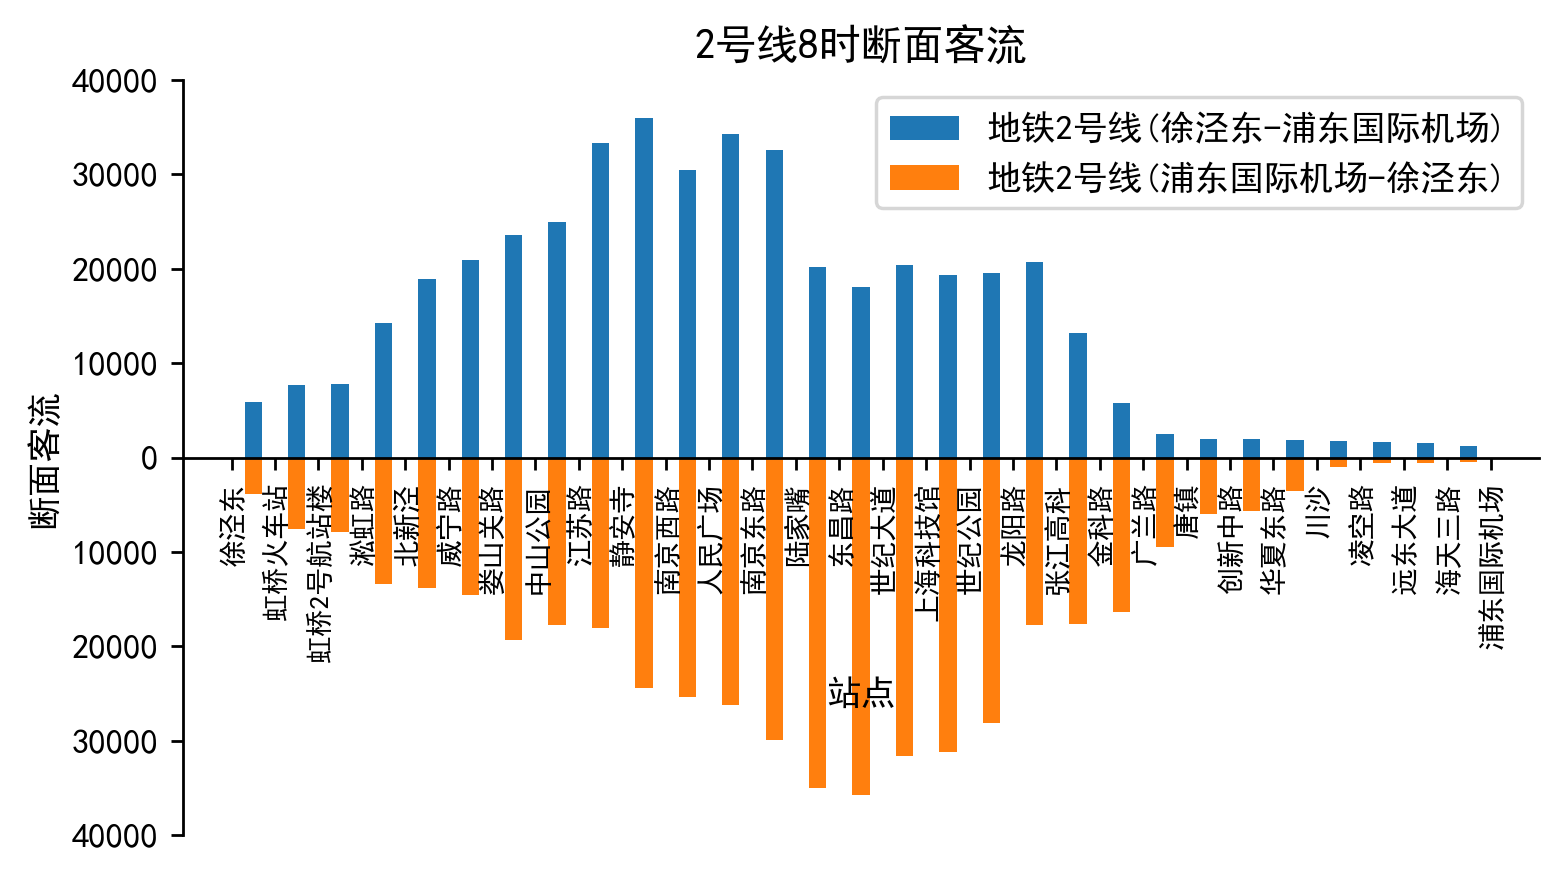

In [36]:
#绘图
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns

fig     = plt.figure(1,(7,4),dpi = 250)    
ax1      = plt.subplot(111)

#绘制上下行断面客流
plt.bar(tmp['x'],tmp['count'],width = 0.4,label = shangxing)
plt.bar(tmp1['x'],-tmp1['count'],width = 0.4,label = xiaxing)

#图框上轴、右轴不显示，图框的下轴放在y轴为0的地方
ax1.spines['bottom'].set_position(('data',0))
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')

#标注站点名称
plt.xticks(np.arange(len(stationnames))-0.5,stationnames,rotation = 90,size = 8)

#图例显示与xy轴标题
plt.legend()
plt.ylabel('断面客流')
plt.xlabel('站点')

#调整y轴显示刻度，不显示负号
locs,labels = plt.yticks()
plt.yticks(locs,abs(locs.astype(int)))

#定义图名
plt.title(linename+'8时断面客流')
plt.show()

# 轨道断面客流蛛网图可视化

In [37]:
#读取轨道站点数据
stop = pd.read_csv(r'data/stop.csv')
#为站点生成geometry列，存储地理信息
stop['geometry'] = geopandas.points_from_xy(stop['lon'],stop['lat'])
#将站点信息由DataFrame转化为GeoDataFrame
stop = geopandas.GeoDataFrame(stop)
#获取地铁线路名称
stop['line'] = stop['linename'].apply(lambda r:r.split('(')[0])
#更改地铁5号线支线的名称
stop.loc[stop['line']=='地铁5号线支线','line'] = '地铁5号线'
stop

,stationnames,linename,lon,lat,geometry,line
0,富锦路,地铁1号线(富锦路-莘庄),121.420012,31.394078,POINT (121.42001 31.39408),地铁1号线
1,友谊西路,地铁1号线(富锦路-莘庄),121.423351,31.382958,POINT (121.42335 31.38296),地铁1号线
2,宝安公路,地铁1号线(富锦路-莘庄),121.426290,31.371680,POINT (121.42629 31.37168),地铁1号线
3,共富新村,地铁1号线(富锦路-莘庄),121.429462,31.356866,POINT (121.42946 31.35687),地铁1号线
4,呼兰路,地铁1号线(富锦路-莘庄),121.433107,31.341553,POINT (121.43311 31.34155),地铁1号线
...,...,...,...,...,...,...
945,三鲁公路,轨道交通浦江线(沈杜公路-汇臻路),121.523211,31.058207,POINT (121.52321 31.05821),轨道交通浦江线
946,闵瑞路,轨道交通浦江线(沈杜公路-汇臻路),121.526112,31.050321,POINT (121.52611 31.05032),轨道交通浦江线
947,浦航路,轨道交通浦江线(沈杜公路-汇臻路),121.526392,31.043280,POINT (121.52639 31.04328),轨道交通浦江线
948,东城一路,轨道交通浦江线(沈杜公路-汇臻路),121.527925,31.032497,POINT (121.52793 31.03250),轨道交通浦江线


In [38]:
#产生各线路的站点编号
#首先为站点编号，包括两个步骤，生成一列可排序的列
stop['ID'] = range(len(stop))
#再按线路名进行分组排序
stop['ID'] = stop.groupby(['linename'])['ID'].rank().astype(int)
#为地铁4号线环线补充两个站点
#提取地铁4号线的首个站点
r3 = stop[stop['linename']=='地铁4号线(内圈(宜山路-宜山路))'].iloc[0]
#将其编号更改为4号线站点数+1
r3['ID'] = len(stop[stop['linename']=='地铁4号线(内圈(宜山路-宜山路))'])+1
#将更改编号的站点插入表中，此时该站点在表中拥有两条记录
stop = stop.append(r3)
#再为4号线另一个方向也做相同操作
r3 = stop[stop['linename']=='地铁4号线(外圈(宜山路-宜山路))'].iloc[0]
r3['ID'] = len(stop[stop['linename']=='地铁4号线(外圈(宜山路-宜山路))'])+1
stop = stop.append(r3)
#对线路与站点ID进行排序
stop = stop.sort_values(by = ['linename','ID'])

In [39]:
#读取轨道线路gis文件
line = geopandas.GeoDataFrame.from_file('data/line.json',encoding = 'utf-8')
#取出第一条线路
r = line.iloc[0]
#提取其几何线型
line_geometry = r['geometry']
type(line_geometry)

shapely.geometry.linestring.LineString

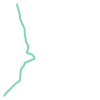

In [40]:
line_geometry

In [41]:
#提取相应的站点
tmp = stop[stop['linename'] == r['linename']]
#生成轨道断面信息表
for i in tmp.columns:
    tmp[i+'1'] = tmp[i].shift(-1)
tmp = tmp.iloc[:-1]
tmp = tmp[['stationnames','stationnames1','geometry','geometry1','linename']]
#提取轨道段起终点在线路上对应的位置
tmp['o_project'] = tmp['geometry'].apply(lambda r1:r['geometry'].project(r1))
tmp['d_project'] = tmp['geometry1'].apply(lambda r1:r['geometry'].project(r1))
tmp

,stationnames,stationnames1,geometry,geometry1,linename,o_project,d_project
28,莘庄,外环路,POINT (121.38112 31.11298),POINT (121.38839 31.12282),地铁1号线(莘庄-富锦路),0.000598,0.012812
29,外环路,莲花路,POINT (121.38839 31.12282),POINT (121.39815 31.13275),地铁1号线(莘庄-富锦路),0.012812,0.026746
30,莲花路,锦江乐园,POINT (121.39815 31.13275),POINT (121.40953 31.14387),地铁1号线(莘庄-富锦路),0.026746,0.042661
31,锦江乐园,上海南站,POINT (121.40953 31.14387),POINT (121.42522 31.15678),地铁1号线(莘庄-富锦路),0.042661,0.063146
32,上海南站,漕宝路,POINT (121.42522 31.15678),POINT (121.43029 31.17029),地铁1号线(莘庄-富锦路),0.063146,0.078490
33,漕宝路,上海体育馆,POINT (121.43029 31.17029),POINT (121.43182 31.18388),地铁1号线(莘庄-富锦路),0.078490,0.092131
34,上海体育馆,徐家汇,POINT (121.43182 31.18388),POINT (121.43373 31.19467),地铁1号线(莘庄-富锦路),0.092131,0.103139
35,徐家汇,衡山路,POINT (121.43373 31.19467),POINT (121.44215 31.20688),地铁1号线(莘庄-富锦路),0.103139,0.118129
36,衡山路,常熟路,POINT (121.44215 31.20688),POINT (121.44671 31.21552),地铁1号线(莘庄-富锦路),0.118129,0.128608
37,常熟路,陕西南路,POINT (121.44671 31.21552),POINT (121.45564 31.21923),地铁1号线(莘庄-富锦路),0.128608,0.138280


In [42]:
#定义函数：输入每一行轨道段和轨道线，输出是轨道断面信息的LineString
import numpy as np
from shapely.geometry import LineString
def getline(r2,line_geometry):
    #生成空的list用以存放轨道断面的节点
    ls = []
    #对大部分情况，线段的起点的位置在终点前，在起终点之间生成10个点
    if r2['o_project']<r2['d_project']:
        #numpy的linespace线性插值生成10个点距离线段起点的距离
        tmp1 = np.linspace(r2['o_project'],r2['d_project'],10)
    #对四号线环线，最后一个站点与第一个站点之间的轨道断面需要特殊处理
    if r2['o_project']>r2['d_project']:
        tmp1 = np.linspace(r2['o_project']-line_geometry.length,r2['d_project'],10)
        tmp1[tmp1<0] = tmp1[tmp1<0]+line_geometry.length
    #tmp1存储的是点距离线段起点的距离，将每个距离转换为点要素，并添加到ls中
    for j in tmp1:
        ls.append(line_geometry.interpolate(j))
    #最后，把点序列转换为线型输出
    return LineString(ls)

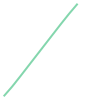

In [43]:
getline(tmp.iloc[0],line_geometry)

<AxesSubplot:>

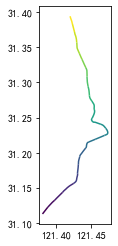

In [44]:
#遍历提取轨道段
tmp['geometry'] = tmp.apply(lambda r2:getline(r2,line_geometry),axis = 1)
tmp = geopandas.GeoDataFrame(tmp)
tmp.plot(column = 'o_project')

<AxesSubplot:>

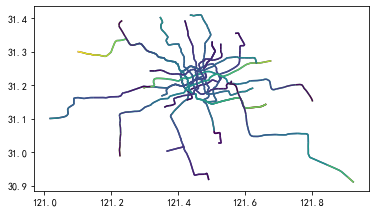

In [45]:
#用轨道站点对轨道线进行切分
lss = []
#遍历每条轨道线
for k in range(len(line)):
    r = line.iloc[k]
    #获取轨道线的线型
    line_geometry = r['geometry']
    #提取相应的站点
    tmp = stop[stop['linename'] == r['linename']]
    #生成轨道段
    for i in tmp.columns:
        tmp[i+'1'] = tmp[i].shift(-1)
    tmp = tmp.iloc[:-1]
    tmp = tmp[['stationnames','stationnames1','geometry','geometry1','linename']]
    #提取轨道段起终点在线路上对应的位置
    tmp['o_project'] = tmp['geometry'].apply(lambda r1:r['geometry'].project(r1))
    tmp['d_project'] = tmp['geometry1'].apply(lambda r1:r['geometry'].project(r1))
    #遍历提取轨道段
    tmp['geometry'] = tmp.apply(lambda r2:getline(r2,line_geometry),axis = 1)
    #提取的轨道段放进list中
    lss.append(tmp)
#遍历完后，合并list里的表，得到轨道断面信息表
metro_line_splited = pd.concat(lss)
#绘制轨道断面
metro_line_splited.plot(column = 'o_project')

<AxesSubplot:>

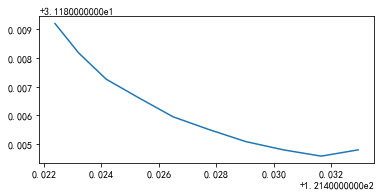

In [46]:
#观察四号线环线的最后一段有没有补上
metro_line_splited[metro_line_splited['linename'] == '地铁4号线(内圈(宜山路-宜山路))'].iloc[-1:].plot()

In [47]:
#提取线路名
metro_line_splited['line'] = metro_line_splited['linename'].apply(lambda r:r.split('(')[0].lstrip('地铁'))
#五号线支线 去掉 支线两个字
metro_line_splited.loc[metro_line_splited['line'] == '5号线支线','line'] = '5号线'
#补齐起终点站点名称
metro_line_splited['o'] = metro_line_splited['line'] +  metro_line_splited['stationnames']
metro_line_splited['d'] = metro_line_splited['line'] +  metro_line_splited['stationnames1']
#提取有用的列
metro_line_splited = metro_line_splited[['o','d','geometry']]
#存储分割的轨道断面线型,如果数据中有中文，编码格式注意要encoding = 'utf-8'，否则再读取会显示乱码。同时，存储时也需要保证只有geometry一列内容为地理图形要素，如果存在其他列，则存储也会失败
metro_line_splited.to_file(r'data/metro_line_splited.json',driver = 'GeoJSON',encoding = 'utf-8')

In [48]:
#连接客流
metro_line_toplot = pd.merge(metro_line_splited,metro_passenger, on =['o','d'])

In [49]:
metro_line_toplot['linewidth'] = metro_line_toplot['count']/metro_line_toplot['count'].max()

In [50]:
#对轨道断面按客流大小分10组，不同分组的线宽不同
groupnum = 10
metro_line_toplot = metro_line_toplot.sort_values(by = 'count')
metro_line_toplot['linewidth'] = (np.arange(len(metro_line_toplot))*groupnum/len(metro_line_toplot)).astype(int)/groupnum+0.1


In [51]:
#平移轨道线
metro_line_parallel = metro_line_toplot.copy()
#设定平移的距离比例，这个参数与后面绘图的线宽对应，两者需要一起调整
rate = 0.004
#对轨道断面线型平移
metro_line_parallel['geometry'] = metro_line_parallel.apply(lambda r:r['geometry'].parallel_offset(rate*r['linewidth']),axis = 1)
#扩样25倍
metro_line_parallel['count'] *= 25

In [52]:
#删除空的geometry
metro_line_parallel = metro_line_parallel[-metro_line_parallel.is_empty]

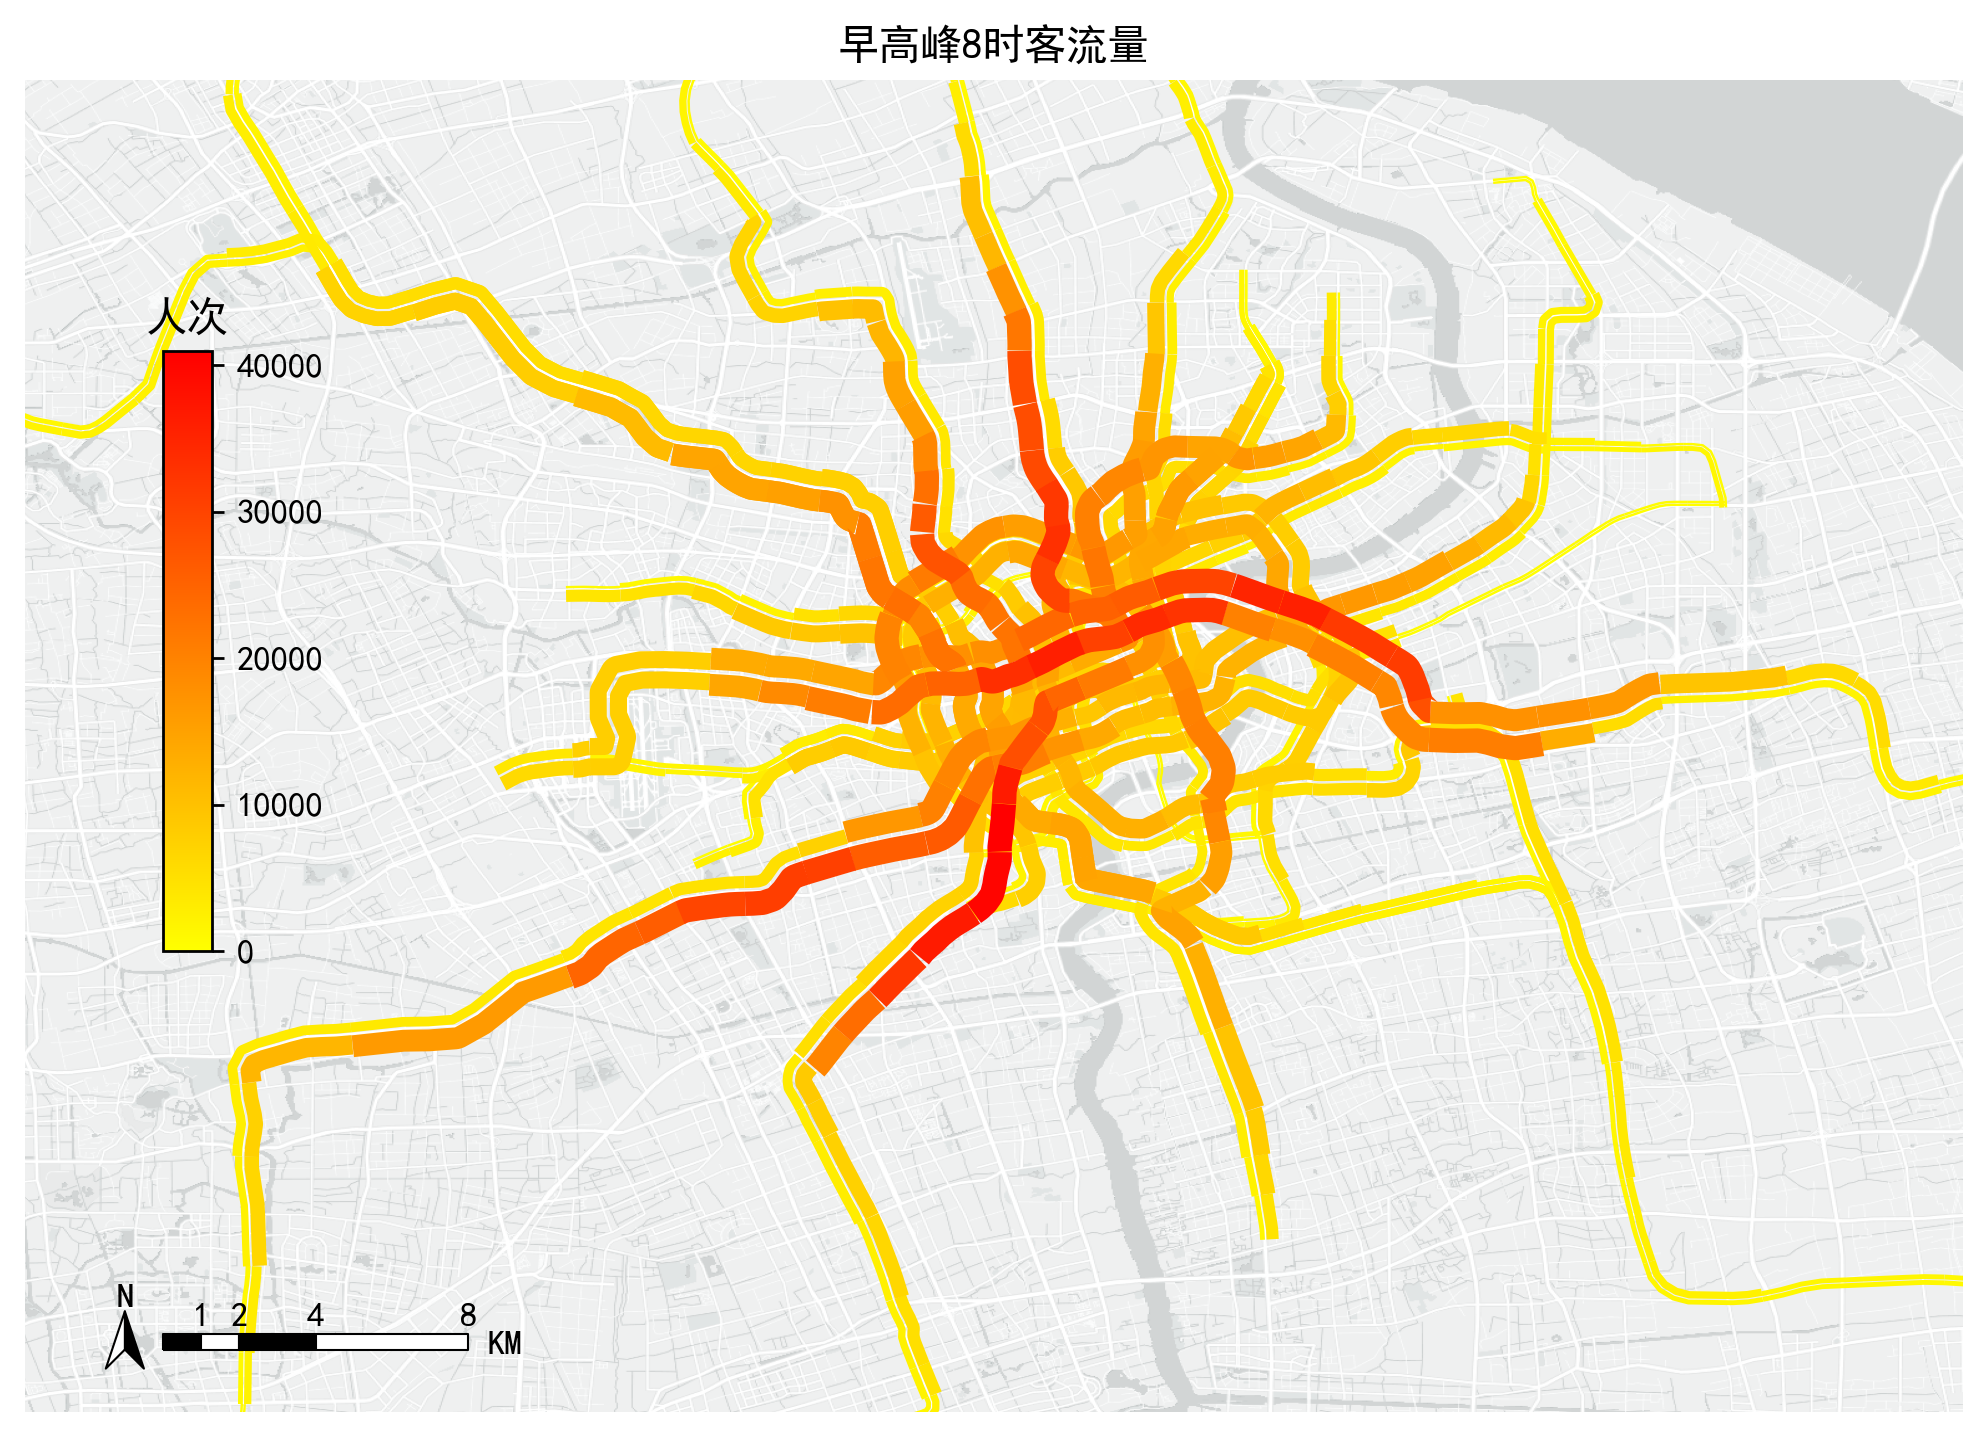

In [60]:
#绘制轨道断面蛛网图
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,8),dpi = 250)
ax = plt.subplot(111)
plt.sca(ax)
#加载底图，设定绘图边界
import transbigdata as tbd
bounds  = [121.166, 30.966, 121.8, 31.483]
tbd.plot_map(plt,bounds,zoom = 12,style = 11)
#设置colormap的数据
import matplotlib
vmax = metro_line_parallel['count'].max()
cmapname = 'autumn_r'
cmap = matplotlib.cm.get_cmap(cmapname)
#设置colorbar
cax = plt.axes([0.18, 0.4, 0.02, 0.3])
plt.title('人次')
plt.sca(ax)
#绘制轨道客流，这里线宽参数与前面平移的距离比例对应，两者需要一起调整
metro_line_parallel.plot(ax = ax,column = 'count',
                         lw = metro_line_parallel['linewidth']*7,#设置线型的粗细
                         cmap = cmap,vmin = 0,vmax = vmax,
                         legend=True,cax = cax)
#设置显示范围
plt.axis('off')
ax.set_xlim(bounds[0],bounds[2]-0.1)
ax.set_ylim(bounds[1]+0.05,bounds[3]-0.1)
plt.title('早高峰8时客流量')
# 加比例尺和指北针
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 1000,rect = [0.06,0.13],zorder = 10)
plt.show()

# 线段平移测试代码

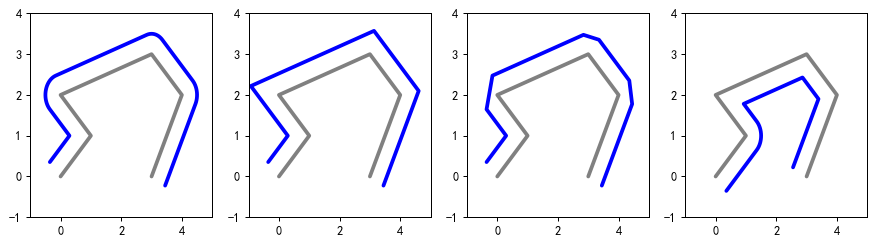

In [ ]:
from shapely.geometry import LineString
from matplotlib import pyplot as plt
fig = plt.figure(1, figsize=(12,3), dpi=90)
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
def plot_line(ax, ob, color):
    parts = hasattr(ob, 'geoms') and ob or [ob]
    for part in parts:
        x, y = part.xy
        ax.plot(x, y, color=color, linewidth=3, solid_capstyle='round', zorder=1)
        
line = LineString([[0,0],[1,1],[0,2],[3,3],[4,2],[3,0]])
plot_line(ax1,line,color = 'gray')
plot_line(ax1,line.parallel_offset(0.5,'left',join_style = 1),color = 'blue')
plot_line(ax2,line,color = 'gray')
plot_line(ax2,line.parallel_offset(0.5,'left',join_style = 2),color = 'blue')

plot_line(ax3,line,color = 'gray')
plot_line(ax3,line.parallel_offset(0.5,'left',join_style = 3),color = 'blue')
plot_line(ax4,line,color = 'gray')
plot_line(ax4,line.parallel_offset(0.5,'right'),color = 'blue')

ax1.set_xlim(-1,5)
ax1.set_ylim(-1,4)
ax2.set_xlim(-1,5)
ax2.set_ylim(-1,4)
ax3.set_xlim(-1,5)
ax3.set_ylim(-1,4)
ax4.set_xlim(-1,5)
ax4.set_ylim(-1,4)
plt.show()